In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

- step through top 10k words
- query the complete series
- bootstrap
- get largest zscore from expected
- sort, plot

In [2]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(10000)

In [9]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    samples = multinomial(series.sum(), series/series.sum(), n)
    return samples / series.sum()

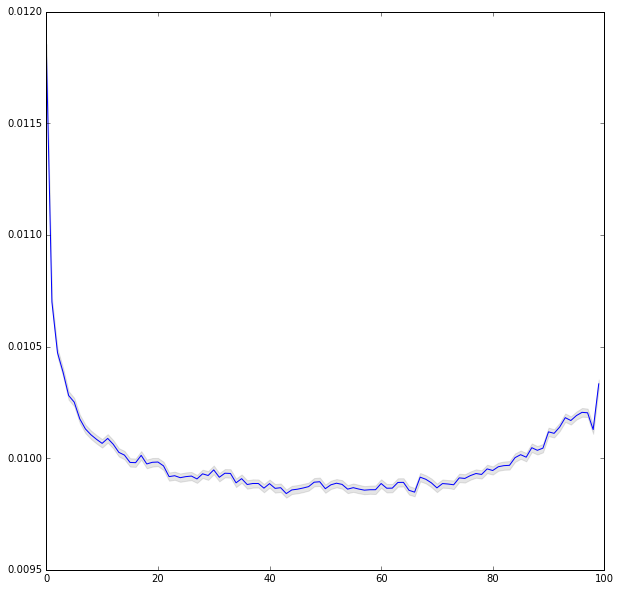

In [35]:
series = Token.token_series('the')

bs = bootstrap(series)

plt.figure(figsize=(10,10))

plt.plot(bs.mean(0))

plt.fill_between(
    range(100),
    bs.mean(0) + 2*bs.std(0),
    bs.mean(0) - 2*bs.std(0),
    color='black',
    alpha=0.1,
)

plt.show()

In [40]:
import numpy as np

zscores = np.array([
    abs(m-1/100)/std
    for m, std in zip(bs.mean(0), bs.std(0))
])

zscores.max()

182.9987801344511